# DPCCA analysis with time lags

For dpcca analysis with time lags we compare original data array and shifted data array by $\tau$.

We have global restrictions which apply to the entire data array and local restrictions which apply to the data in current time window.

$L$-length of the current data window.

$N$-length of input data array.

$t$-window start index in global data array.

$i$-current index of current element in data array.

# Global restrictions for array with time lags
$$
\begin{cases}
i\geq 0\\
i\leq N-1-\tau
\end{cases}
$$

# Local restrictions in current window with time lags
$$
\begin{cases}
i\geq t\\
i\leq t+L-1\\
L-\tau-1\geq 0
\end{cases}
$$

# Mutual restrictions for current element in current data window in current data array
$$
i\in [\text{max}[0;t];\text{min}(N-\tau;t+L)]
$$

# Relations between local and global indecies in data arrays
$$
\text{local index of element in data window for array without lag}=i-t\\
\text{local index of element in data window for array with lag}=(i-t)+\tau=\text{local index of element in data window for array without lag}+\tau
$$

For each window and lag $\tau$ only valid index pairs $(i,i+\tau)$ are considered for which both values $x[i]$ and $y[i+\tau]$ are defined.

Select the array of points that meets the constraints in input data array with time lags for analysis:
$$
\text{array}=N-\tau-t
$$

Select the array of points that meets the constraints in current window with time lags for analysis:
$$
\text{array}=L-\tau
$$

# Final mutual restrictions for current element in current data window in current data array
$$
i\in [\text{min}(N-\tau-t;L-\tau)]
$$



# Test of creating signal and shifted signal with impulse function

In [ ]:
import numpy as np
from dpcca import tdc_dpcca_worker
import matplotlib.pyplot as plt

In [ ]:
length = 50
impulse_func=np.zeros(length)
impulse_index=25
impulse_func[impulse_index]=1
time_lag= 4
lag_range=np.arange(time_lag-3,time_lag+1)
original_signal=impulse_func[time_lag:]
lag_signal=impulse_func[:-time_lag]
signals = np.vstack([original_signal, lag_signal])
s = [30, 40, 45]
p,r,f=tdc_dpcca_worker(
    s=s,
    arr=signals,
    step=1,
    pd=1,
    time_delays=lag_range,
    flag_use_lags=True,
    n_integral=0,
)
for s_idx in range(len(s)):
    correlation = r[:, s_idx,0,1]
    max_lag_idx = np.argmax(correlation)
    print("true lag", lag_range[max_lag_idx])
print("original signal", original_signal)
print("shifted signal", lag_signal)
print("lag_range", lag_range)

true lag 4
true lag 4
true lag 4
original signal [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shifted signal [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lag_range [1 2 3 4]


Conclusion: Estimated time lag equals adjusted time lag.

# Visualisation

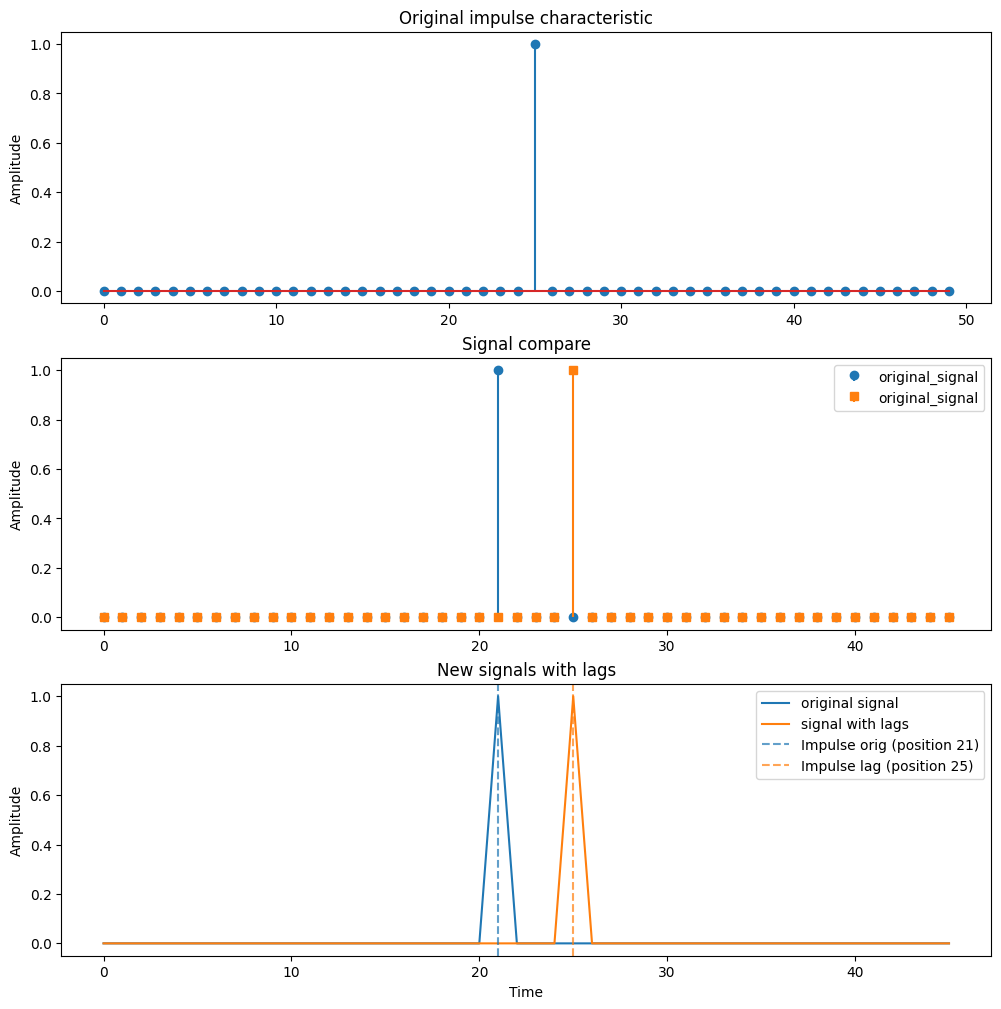

In [199]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.stem(np.arange(length), impulse_func)
plt.title("Original impulse characteristic")
plt.ylabel("Amplitude")

plt.subplot(3,1,2)
x_original=np.arange(len(original_signal))
x_lag=np.arange(len(lag_signal))

plt.stem(x_original, original_signal,linefmt='C0-', markerfmt='C0o', basefmt=" ", label='original_signal')
plt.stem(x_lag, lag_signal,linefmt='C1-', markerfmt='C1s', basefmt=" ", label='original_signal')
plt.title("Signal compare")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3,1,3)
plt.plot(x_original, original_signal, label="original signal")
plt.plot(x_lag, lag_signal, label="signal with lags")
plt.axvline(x=impulse_index - time_lag, color='C0', linestyle='--', alpha=0.7, label=f'Impulse orig (position {impulse_index - time_lag})')
plt.axvline(x=impulse_index, color='C1', linestyle='--', alpha=0.7, label=f'Impulse lag (position {impulse_index})')
plt.title("New signals with lags")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.show()
